### **Installing and Importing Dependencies:**

In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[]

### **Remove Dubious Images**

In [ ]:
import cv2
import imghdr

In [ ]:
import os
import shutil
import zipfile

# Create data directory
data_dir = '/content/data'
os.makedirs(data_dir, exist_ok=True)

# List of zip files
zip_files = ['ANGRY.zip', 'HAPPY.zip', 'SAD.zip', 'SCARED.zip']

# Extract zip files and remove them
for zip_file in zip_files:
    zip_file_path = os.path.join(data_dir, zip_file)
    target_dir = os.path.join(data_dir, zip_file.replace('.zip', ''))

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(target_dir)
    os.remove(zip_file_path)

# Organize files into subfolders
subfolder_names = ['ANGRY', 'HAPPY', 'SAD', 'SCARED']

for subfolder_name in subfolder_names:
    subfolder_path = os.path.join(data_dir, subfolder_name)

    if os.path.exists(subfolder_path) and os.path.isdir(subfolder_path):
        files_to_move = os.listdir(subfolder_path)

        for file_name in files_to_move:
            source_path = os.path.join(subfolder_path, file_name)
            target_path = os.path.join(data_dir, subfolder_name, file_name)
            shutil.move(source_path, target_path)

        os.rmdir(subfolder_path)  # Remove empty subfolder

print("Files organized successfully.")


In [ ]:
data = '/content/data'

if os.path.exists(data) and os.path.isdir(data):
    subfolder_name = 'HAPPY'
    subfolder_path = os.path.join(data, subfolder_name)

    if os.path.exists(subfolder_path) and os.path.isdir(subfolder_path):
        print(f"Contents of subfolder '{subfolder_name}':")
        for file_name in os.listdir(subfolder_path):
            print(file_name)
    else:
        print(f"Subfolder '{subfolder_name}' does not exist or is not a directory.")
else:
    print(f"Data directory '{data}' does not exist or is not a directory.")


Contents of subfolder 'HAPPY':
MV5BZjYwNTc1M2MtM2YxMi00YzYyLTkxY2ItY2I3OWE3NDBmNDVmXkEyXkFqcGdeQXVyMjkwOTAyMDU._V1_.jpg
images84.jpg
images104.jpg
images57.jpg
images36.jpg
images126.jpg
images162.jpg
images31.jpg
images10.jpg
hdptcar-fi-2.jpg
1-2.jpg
group-young-happy-people-with-their-hands-up_369728-62.jpg
images128.jpg
png-transparent-graphy-happy-people-love-child-photography-thumbnail.png
image16.jpeg
images157.jpg
getty_152414899_97046097045006_68075.jpg
Successful-year.jpg
images32.jpg
o-happy-old-people-facebook-1038x519.jpg
images42.jpg
images124.jpg
business-people-succesful-celebrating-group-successful-39416686-800x500.jpg
41740_hd.jpg
image17.jpeg
9b65a25adca61c48bcb01370116723e3--happy-people-brings.jpg
images53.jpg
images110.jpg
images41.jpg
happyball-3.jpg
image23.jpeg
Happy.jpg
images113.jpg
2560px-Happy_People.jpg
images92.jpg
guilherme-stecanella-375176-unsplash.jpg
images147.jpg
images130.jpg
images51.jpg
images61.jpg
images153.jpg
images100.jpg
05-12-21-happy-peopl

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [ ]:
for image_class in os.listdir(data):
    for image in os.listdir(os.path.join(data, image_class)):
        image_path = os.path.join(data, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list /content/data/HAPPY/2560px-Happy_People.jpg
Image not in ext list /content/data/HAPPY/guilherme-stecanella-375176-unsplash.jpg
Image not in ext list /content/data/HAPPY/happiness_thumbnail.jpg
Image not in ext list /content/data/HAPPY/who-is-happier.jpg
Image not in ext list /content/data/HAPPY/sjnv_cnh7ugnaddm7so6sq.jpg
Image not in ext list /content/data/HAPPY/where-to-watch-shiny-happy-people.jpg
Image not in ext list /content/data/SCARED/scared-man-260nw-498829219.jpg
Image not in ext list /content/data/SCARED/scared-young-businessman-isolated-on-260nw-92455441.jpg
Image not in ext list /content/data/SCARED/Couple_Talking_Serious_Relationship-732x549-Thumbnail.jpg
Image not in ext list /content/data/SCARED/0_clown-7813315_1920.jpg
Image not in ext list /content/data/SAD/depositphotos_508407352-stock-photo-caucasian-male-sitting-floor-windows.jpg
Image not in ext list /content/data/SAD/depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Image not in ext li

### **Loading Data**

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 229 files belonging to 4 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
len(batch)

2

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[1]

array([1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       3, 3, 3, 1, 0, 0, 1, 0, 1, 2], dtype=int32)

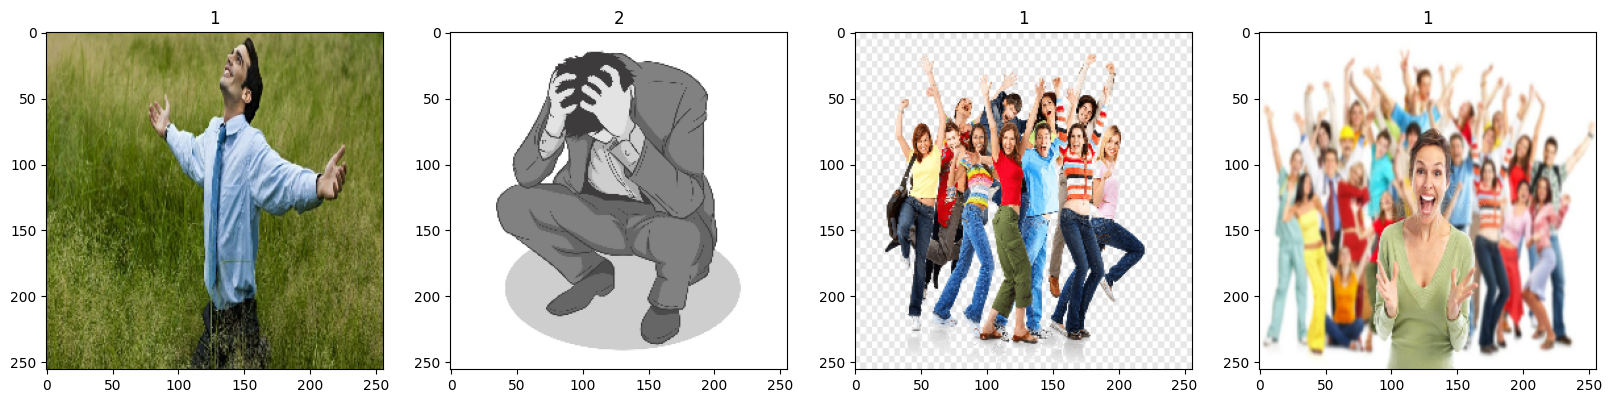

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## **Preprocessing Data**

 **Scale Data**

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
scaled_iterator = data.as_numpy_iterator().next()

In [ ]:
scaled_iterator[0].max()

1.0

In [ ]:
scaled_iterator[0].min()

0.0

 **Split Data**

In [ ]:
len(data)

8

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [ ]:
train_size

5

In [ ]:
val_size

2

In [ ]:
test_size

1

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(test)

1

**One-Hot Encoding**

In [ ]:
# One-Hot Encode Labels
num_classes = 4

def one_hot_encode(x, y):
    return x, tf.one_hot(y, num_classes)

train = train.map(one_hot_encode)
val = val.map(one_hot_encode)
test = test.map(one_hot_encode)


## **Build Deep Learning Model**

In [ ]:
train

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
num_classes = 4
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## **Train**

In [ ]:
logdir = '/content/logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 13s 2s/step - loss: 2.5828 - accuracy: 0.5188 - val_loss: 1.1676 - val_accuracy: 0.5312
Epoch 2/20
5/5 [==============================] - 17s 2s/step - loss: 1.1726 - accuracy: 0.6438 - val_loss: 1.0997 - val_accuracy: 0.6875
Epoch 3/20
5/5 [==============================] - 12s 2s/step - loss: 1.0038 - accuracy: 0.6687 - val_loss: 0.9984 - val_accuracy: 0.6875
Epoch 4/20
5/5 [==============================] - 13s 2s/step - loss: 1.0656 - accuracy: 0.6438 - val_loss: 1.0315 - val_accuracy: 0.6250
Epoch 5/20
5/5 [==============================] - 14s 2s/step - loss: 0.9864 - accuracy: 0.6375 - val_loss: 0.8879 - val_accuracy: 0.6719
Epoch 6/20
5/5 [==============================] - 12s 2s/step - loss: 0.9429 - accuracy: 0.6313 - val_loss: 0.9641 - val_accuracy: 0.6406
Epoch 7/20
5/5 [==============================] - 14s 3s/step - loss: 0.8460 - accuracy: 0.7000 - val_loss: 1.0087 - val_accuracy: 0.6094
Epoch 8/20
5/5 [==================

## **Plot Performance**

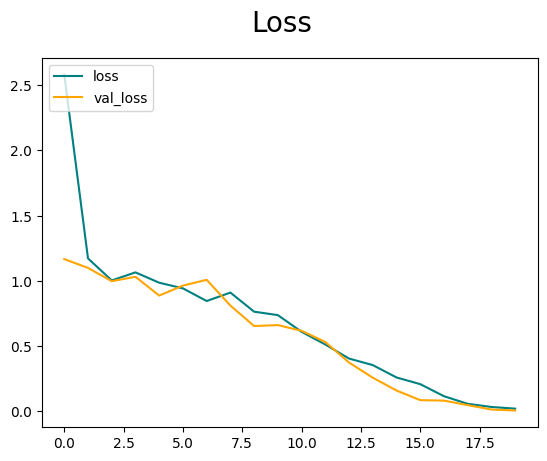

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

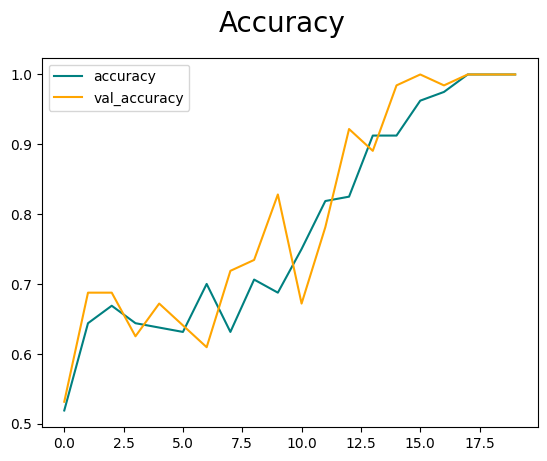

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## **Evaluate**

In [ ]:
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall

In [ ]:
acc = CategoricalAccuracy()
pre = Precision()
re = Recall()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    acc.update_state(y, yhat)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)

1/1 [==============================] - 0s 166ms/step


In [ ]:
print("Overall Accuracy:", acc.result().numpy())
print("Overall Precision:", pre.result().numpy())
print("Overall Recall:", re.result().numpy())

Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0


## **Test**

In [ ]:
import cv2

In [ ]:
img = cv2.imread('/content/HAPPYTEST.jpg')
print(img)

[[[ 8  5  1]
  [ 8  5  1]
  [ 8  5  1]
  ...
  [19 16  1]
  [19 16  1]
  [19 16  1]]

 [[ 8  5  1]
  [ 8  5  1]
  [ 8  5  1]
  ...
  [19 16  1]
  [19 16  1]
  [19 16  1]]

 [[ 8  5  1]
  [ 8  5  1]
  [ 8  5  1]
  ...
  [19 16  1]
  [19 16  1]
  [19 16  1]]

 ...

 [[ 6 14 14]
  [ 3 11 11]
  [33 39 38]
  ...
  [ 1 12 10]
  [ 8 15 12]
  [ 6 13  8]]

 [[ 7 12 11]
  [ 6 11 10]
  [ 9 11 11]
  ...
  [ 5 12  9]
  [ 7 14  9]
  [ 6 13  6]]

 [[ 7  9  9]
  [13 15 15]
  [ 3  3  3]
  ...
  [ 4 11  6]
  [ 7 13  8]
  [ 5 12  5]]]


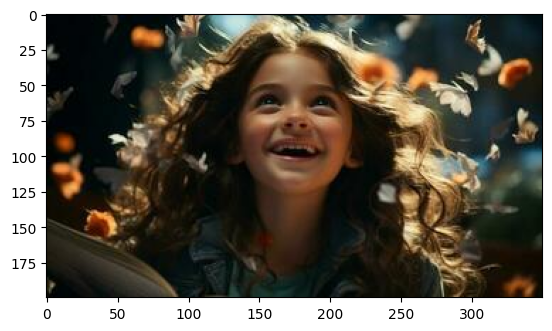

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

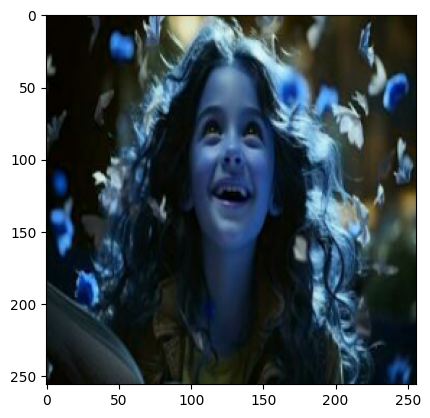

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 33ms/step


In [ ]:
yhat

array([[0.00251044, 0.9722048 , 0.00471881, 0.02056592]], dtype=float32)

We know that "HAPPY" class was represented by 1, hence the model is making almost accurate prediction.

### **Save the model**

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('/content/models/imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 98ms/step


array([[0.00251044, 0.9722048 , 0.00471881, 0.02056592]], dtype=float32)